<a href="https://colab.research.google.com/github/konstantinosPapado/Digits_KNN/blob/main/Digits_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 5. Feature Importance, Dimensionality Reduction, KNN

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
import cv2
from PIL import Image

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Unique values, digits [0:9]

In [3]:
unique = np.unique(y_train)
print(unique)

[0 1 2 3 4 5 6 7 8 9]


Plot a single random image for every unique value that the target gets.

53403
17928
44049
46027
57389
35611
24242
13405
44072
39593


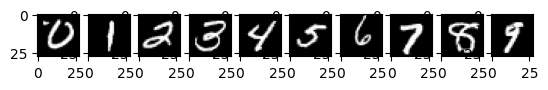

In [13]:
for i in range(0,10):
  found = True
  while(found):
    index=np.random.choice(np.where( y_train == i)[0])
    if(y_train[index]==i):
      found=False
    print(index)
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[index], cmap=plt.get_cmap('gray'))
plt.show()

In [15]:
print(x_train.shape)

(60000, 28, 28)


The shape of every image is 28x28. Not all pixels are important only the ones that are white, but also the black ones close to the area of the whites. In MNIST dataset wherer all digits are centered, the pixels at the corners are useless.

Tranform the x_train and x_test into vectors using reshape.

In [16]:
x_train_vec=x_train.reshape(x_train.shape[0],-1)
x_test_vec=x_test.reshape(x_test.shape[0],-1)
print(x_train_vec.shape)
print(x_test_vec.shape)

(60000, 784)
(10000, 784)


Using various values for k and training the KNN and keeping the train and test accuracies.

In [17]:
k_values=[1,3,5,7,9,10]

In [29]:
limit = 4000

In [30]:
train_limit=x_train_vec[:limit]
test_limit=x_test_vec[:limit]
y_train_limit=y_train[:limit]
y_test_limit=y_test[:limit]

In [31]:
train_acc=[]
test_acc=[]
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(train_limit, y_train_limit)
  train_acc.append(knn.score(train_limit, y_train_limit))
  test_acc.append(knn.score(test_limit, y_test_limit))
  print("For k=",k, ", the train acc is ", train_acc[-1], " and the test acc is ", test_acc[-1])

For k= 1 , the train acc is  1.0  and the test acc is  0.89975
For k= 3 , the train acc is  0.96775  and the test acc is  0.899
For k= 5 , the train acc is  0.95525  and the test acc is  0.897
For k= 7 , the train acc is  0.94725  and the test acc is  0.89475
For k= 9 , the train acc is  0.94125  and the test acc is  0.8915
For k= 10 , the train acc is  0.9395  and the test acc is  0.89


We see that the highest accuracies are for k = 1.

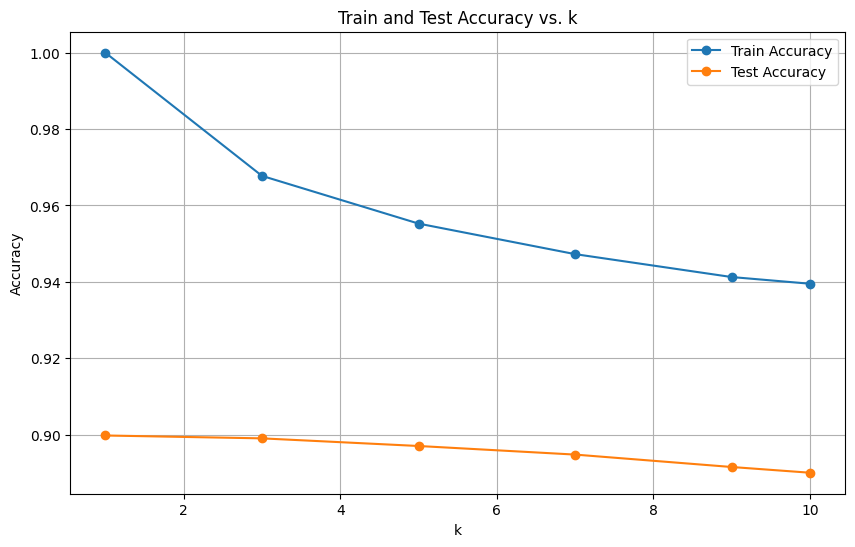

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_acc, marker='o', label='Train Accuracy')
plt.plot(k_values, test_acc, marker='o', label='Test Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs. k')
plt.legend()
plt.grid(True)
plt.show()

Let's see the changes if we normalize the data.

In [36]:
x_train_normal=x_train_vec.astype('float32')/255
x_test_normal=x_test_vec.astype('float32')/255

In [39]:
train_norm_acc=[]
test__norm_acc=[]
train_norm_limit=x_train_normal[:limit]
test_norm_limit=x_test_normal[:limit]
y_train_limit=y_train[:limit]
y_test_limit=y_test[:limit]
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(train_norm_limit, y_train_limit)
  train_norm_acc.append(knn.score(train_norm_limit, y_train_limit))
  test__norm_acc.append(knn.score(test_norm_limit, y_test_limit))
  print("For k=",k, ", the train acc is ", train_norm_acc[-1], " and the test acc is ", test__norm_acc[-1])

For k= 1 , the train acc is  1.0  and the test acc is  0.89975
For k= 3 , the train acc is  0.96775  and the test acc is  0.899
For k= 5 , the train acc is  0.95525  and the test acc is  0.897
For k= 7 , the train acc is  0.94725  and the test acc is  0.89475
For k= 9 , the train acc is  0.94125  and the test acc is  0.8915
For k= 10 , the train acc is  0.9395  and the test acc is  0.89


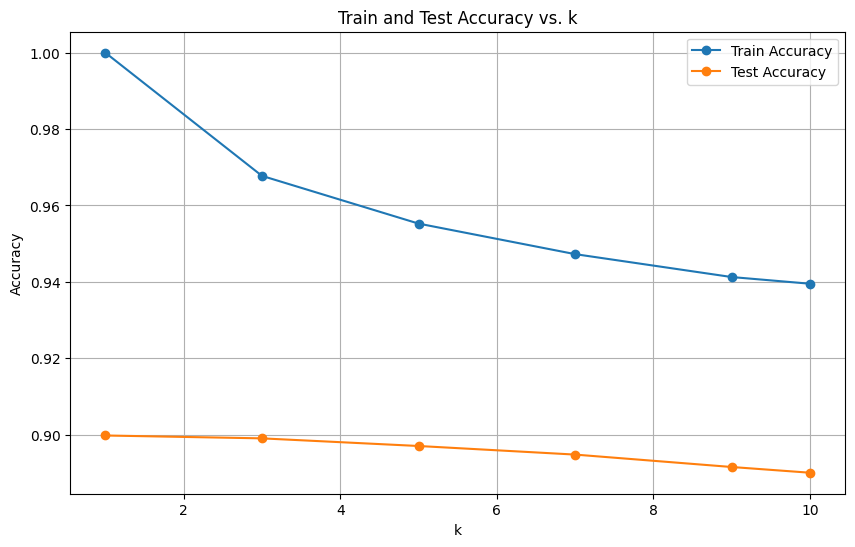

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_norm_acc, marker='o', label='Train Accuracy')
plt.plot(k_values, test__norm_acc, marker='o', label='Test Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs. k')
plt.legend()
plt.grid(True)
plt.show()

No changes observed.

Keep the best for k=1.

In [44]:
model=KNeighborsClassifier(n_neighbors=1)
model.fit(train_limit, y_train_limit)

KNeighborsClassifier(n_neighbors=1)

In [54]:
path='Digit_6.png'

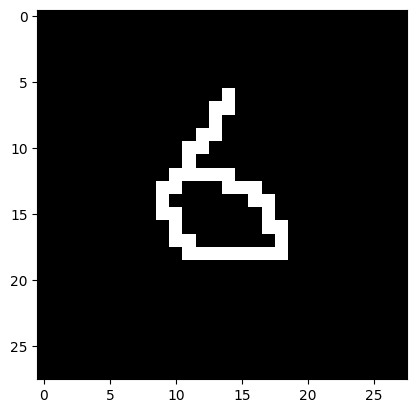

In [58]:
img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()
img=cv2.resize(img,(28,28))
img=img.reshape(1,-1)

In [61]:
prediction = model.predict(img)

In [62]:
print(prediction)

[9]


In our created digit, the model falsely predicted 9 instead of 6.